In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TL_modelling/final_data.csv')

In [5]:
df.head()

,Unnamed: 0,Index,Manufacturer_name,Gear,Odometer (km),year,Fuel,Price ($),Country
0,0,0,subaru,manual,280000.0,2003,gasoline,6900.0,Belarus
1,1,1,subaru,manual,321000.0,2002,gasoline,4300.0,Belarus
2,2,2,subaru,manual,191000.0,2005,gasoline,10950.0,Belarus
3,3,3,subaru,automatic,417000.0,1997,gasoline,1850.0,Belarus
4,4,4,subaru,manual,340000.0,1993,gasoline,2000.0,Belarus


In [6]:
df = df.drop(['Unnamed: 0', 'Index'], axis=1)
df.columns


Index(['Manufacturer_name', 'Gear', 'Odometer (km)', 'year', 'Fuel',
       'Price ($)', 'Country'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407552 entries, 0 to 407551
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Manufacturer_name  407552 non-null  object 
 1   Gear               407552 non-null  object 
 2   Odometer (km)      407552 non-null  float64
 3   year               407552 non-null  int64  
 4   Fuel               407552 non-null  object 
 5   Price ($)          407552 non-null  float64
 6   Country            407552 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 21.8+ MB


In [8]:
(df.Manufacturer_name.value_counts())

ford            61951
chevrolet       42984
toyota          31278
honda           20498
nissan          17141
                ...  
zhidou              1
fisker              1
9ff                 1
mercedes-amg        1
brilliance          1
Name: Manufacturer_name, Length: 107, dtype: int64

In [9]:
(df.Gear.value_counts())

automatic         281242
manual             68617
other              57639
semi-automatic        54
Name: Gear, dtype: int64

In [10]:
(df.Fuel.value_counts())

gas         284380
diesel       45672
gasoline     35142
other        25109
petrol        9517
hybrid        5674
electric      2055
ethanol          2
hydrogen         1
Name: Fuel, dtype: int64

In [11]:
(df.Country.value_counts())

US         332279
Germany     43944
India       19479
Belarus     11850
Name: Country, dtype: int64

In [12]:
df.Fuel.replace({"hydrogen": "other", "ethanol": "other"}, inplace=True)
(df.Fuel.value_counts())

gas         284380
diesel       45672
gasoline     35142
other        25112
petrol        9517
hybrid        5674
electric      2055
Name: Fuel, dtype: int64

In [13]:
df.head()

,Manufacturer_name,Gear,Odometer (km),year,Fuel,Price ($),Country
0,subaru,manual,280000.0,2003,gasoline,6900.0,Belarus
1,subaru,manual,321000.0,2002,gasoline,4300.0,Belarus
2,subaru,manual,191000.0,2005,gasoline,10950.0,Belarus
3,subaru,automatic,417000.0,1997,gasoline,1850.0,Belarus
4,subaru,manual,340000.0,1993,gasoline,2000.0,Belarus


In [14]:
df.describe()

,Odometer (km),year,Price ($)
count,4.075520e+05,407552.000000,4.075520e+05
mean,1.401383e+05,2012.661862,1.798468e+04
std,9.951946e+04,5.528372,1.430996e+04
min,0.000000e+00,1982.000000,1.000000e+03
25%,5.475000e+04,2010.000000,7.499000e+03
50%,1.271057e+05,2014.000000,1.445000e+04
75%,2.092142e+05,2017.000000,2.599500e+04
max,3.800000e+06,2022.000000,1.415882e+06


In [15]:
df.loc[df['Odometer (km)']==0].Country.value_counts()

US         587
Germany     63
Belarus      6
Name: Country, dtype: int64

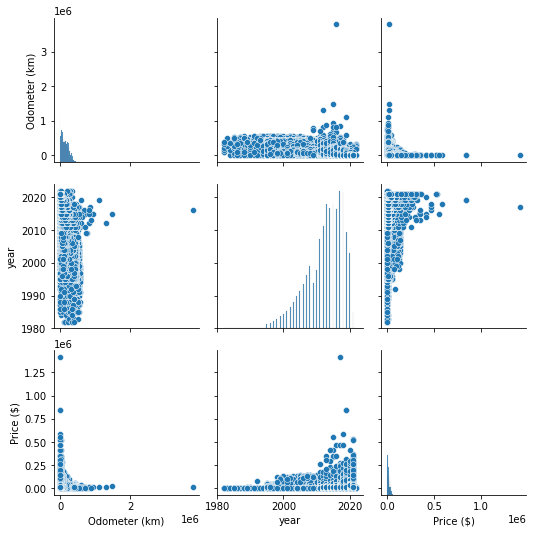

In [16]:
sns.pairplot(df)

In [17]:
df.isnull().sum()

Manufacturer_name    0
Gear                 0
Odometer (km)        0
year                 0
Fuel                 0
Price ($)            0
Country              0
dtype: int64

In [18]:
df.head()

,Manufacturer_name,Gear,Odometer (km),year,Fuel,Price ($),Country
0,subaru,manual,280000.0,2003,gasoline,6900.0,Belarus
1,subaru,manual,321000.0,2002,gasoline,4300.0,Belarus
2,subaru,manual,191000.0,2005,gasoline,10950.0,Belarus
3,subaru,automatic,417000.0,1997,gasoline,1850.0,Belarus
4,subaru,manual,340000.0,1993,gasoline,2000.0,Belarus


# W/O Manufacturer_name feature

In [18]:
f_df = df[['year', 'Price ($)', 'Odometer (km)', 'Gear', 'Fuel', 'Country']]

In [19]:
f_df['no_year'] = 2021 - f_df['year']
f_df.drop(['year'],axis=1,inplace=True)

In [20]:
f_df.shape

(407552, 6)

In [21]:
f_df = pd.get_dummies(f_df, drop_first=True)

In [22]:
f_df.head()

,Price ($),Odometer (km),no_year,Gear_manual,Gear_other,Gear_semi-automatic,Fuel_electric,Fuel_gas,Fuel_gasoline,Fuel_hybrid,Fuel_other,Fuel_petrol,Country_Germany,Country_India,Country_US
0,6900.0,280000.0,18,1,0,0,0,0,1,0,0,0,0,0,0
1,4300.0,321000.0,19,1,0,0,0,0,1,0,0,0,0,0,0
2,10950.0,191000.0,16,1,0,0,0,0,1,0,0,0,0,0,0
3,1850.0,417000.0,24,0,0,0,0,0,1,0,0,0,0,0,0
4,2000.0,340000.0,28,1,0,0,0,0,1,0,0,0,0,0,0


In [23]:
f_df.corr()

,Price ($),Odometer (km),no_year,Gear_manual,Gear_other,Gear_semi-automatic,Fuel_electric,Fuel_gas,Fuel_gasoline,Fuel_hybrid,Fuel_other,Fuel_petrol,Country_Germany,Country_India,Country_US
Price ($),1.000000,-0.460581,-0.534409,-0.221902,0.301542,-0.006518,0.042377,-0.095165,-0.065997,0.012454,0.166049,-0.087360,0.038152,-0.099724,0.091214
Odometer (km),-0.460581,1.000000,0.681548,-0.095976,-0.354099,-0.006430,-0.065510,0.197211,-0.148434,-0.021797,-0.146533,-0.147375,-0.237051,-0.184240,0.212368
no_year,-0.534409,0.681548,1.000000,0.057609,-0.302765,-0.001707,-0.052272,0.129742,-0.035167,-0.040875,-0.154690,-0.048687,-0.205500,-0.075169,0.083784
Gear_manual,-0.221902,-0.095976,0.057609,1.000000,-0.182615,-0.005180,-0.030179,-0.480570,0.478038,-0.033596,-0.107988,0.265939,0.450541,0.378792,-0.692328
Gear_other,0.301542,-0.354099,-0.302765,-0.182615,1.000000,-0.004672,0.046860,-0.024198,-0.124675,0.007364,0.381373,-0.062758,-0.141095,-0.090929,0.193173
Gear_semi-automatic,-0.006518,-0.006430,-0.001707,-0.005180,-0.004672,1.000000,-0.000819,-0.017492,0.026842,-0.001368,-0.002950,-0.001780,0.033113,-0.002579,-0.024186
Fuel_electric,0.042377,-0.065510,-0.052272,-0.030179,0.046860,-0.000819,1.000000,-0.108170,-0.021868,-0.008459,-0.018242,-0.011008,0.050420,-0.013676,-0.027804
Fuel_gas,-0.095165,0.197211,0.129742,-0.480570,-0.024198,-0.017492,-0.108170,1.000000,-0.466763,-0.180547,-0.389361,-0.234954,-0.524410,-0.330982,0.714958
Fuel_gasoline,-0.065997,-0.148434,-0.035167,0.478038,-0.124675,0.026842,-0.021868,-0.466763,1.000000,-0.036501,-0.078716,-0.047500,0.660388,-0.068822,-0.645408
Fuel_hybrid,0.012454,-0.021797,-0.040875,-0.033596,0.007364,-0.001368,-0.008459,-0.180547,-0.036501,1.000000,-0.030448,-0.018373,0.032490,-0.026621,-0.005776


In [34]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(f_df)

In [37]:
scaled_df[:5]

array([[-0.77461398,  1.40537225,  1.74768878,  2.22250295, -0.4058618 ,
        -0.01151156, -0.07118887, -1.51947489,  3.25534806, -0.11882219,
        -0.25624712, -0.15462845, -0.34764267, -0.22404054, -2.10102797],
       [-0.95630582,  1.81735248,  1.92857408,  2.22250295, -0.4058618 ,
        -0.01151156, -0.07118887, -1.51947489,  3.25534806, -0.11882219,
        -0.25624712, -0.15462845, -0.34764267, -0.22404054, -2.10102797],
       [-0.491594  ,  0.5110737 ,  1.38591817,  2.22250295, -0.4058618 ,
        -0.01151156, -0.07118887, -1.51947489,  3.25534806, -0.11882219,
        -0.25624712, -0.15462845, -0.34764267, -0.22404054, -2.10102797],
       [-1.12751544,  2.78198912,  2.83300061, -0.44994316, -0.4058618 ,
        -0.01151156, -0.07118887, -1.51947489,  3.25534806, -0.11882219,
        -0.25624712, -0.15462845, -0.34764267, -0.22404054, -2.10102797],
       [-1.11703322,  2.00827015,  3.55654183,  2.22250295, -0.4058618 ,
        -0.01151156, -0.07118887, -1.51947489, 

In [24]:
X=f_df.iloc[:,1:]
y=f_df.iloc[:,0]

In [25]:
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

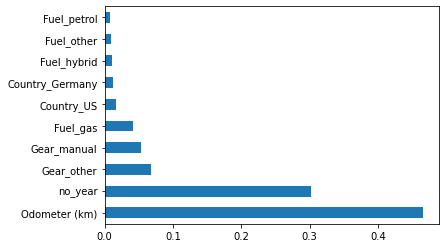

In [26]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#LR

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
pd.DataFrame(model.coef_, X.columns, columns = ['Coeff'])

,Coeff
Odometer (km),-0.039964
no_year,-897.877165
Gear_manual,-7138.364287
Gear_other,2394.278082
Gear_semi-automatic,-10457.751839
Fuel_electric,-11608.660839
Fuel_gas,-15379.270939
Fuel_gasoline,-6221.274450
Fuel_hybrid,-14344.857509
Fuel_other,-13028.419488


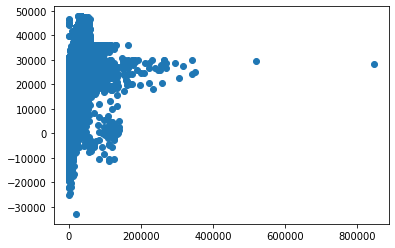

In [46]:
predictions = model.predict(X_test)

plt.scatter(y_test, predictions)

(array([1.21813e+05, 3.78000e+02, 5.80000e+01, 1.20000e+01, 3.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-45445.01467585,  40901.22062826, 127247.45593236, 213593.69123646,
        299939.92654056, 386286.16184467, 472632.39714877, 558978.63245287,
        645324.86775697, 731671.10306108, 818017.33836518]),
 <a list of 10 Patch objects>)

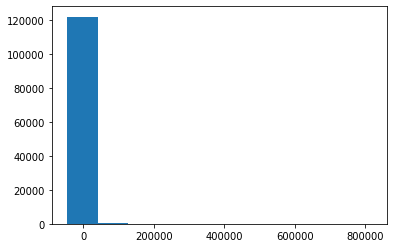

In [47]:
plt.hist(y_test - predictions)

In [48]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 10677.039631930578


In [49]:
from sklearn.metrics import r2_score

r2_score(y_test, predictions)

0.430972282200068

# RF

In [28]:
#rf = RandomForestRegressor()
rf1 = RandomForestRegressor(random_state=1, n_estimators=700)
rf1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=700, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [29]:
rf_test_predictions=rf1.predict(X_test)

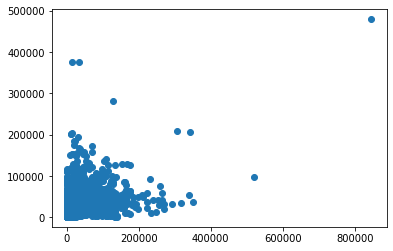

In [30]:
plt.scatter(y_test,rf_test_predictions)

(array([2.00000e+00, 0.00000e+00, 1.40000e+01, 1.49000e+02, 1.21514e+05,
        5.17000e+02, 5.40000e+01, 1.10000e+01, 3.00000e+00, 2.00000e+00]),
 array([-360678.69409122, -282455.85341464, -204233.01273807,
        -126010.17206149,  -47787.33138492,   30435.50929166,
         108658.34996824,  186881.19064481,  265104.03132139,
         343326.87199796,  421549.71267454]),
 <a list of 10 Patch objects>)

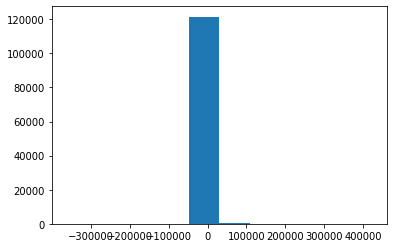

In [31]:
#sns.distplot(y_test-predictions)
plt.hist(y_test-rf_test_predictions)

In [32]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_test_predictions)))

RMSE: 8875.238606528716


In [33]:
rf1.score(X_test,y_test)

0.6068196657366669

In [56]:
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [57]:
# Create the random grid
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [58]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [62]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=5, random_state=42, n_jobs = None)

In [63]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, score=0.410, total=   7.3s
[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s remaining:    0.0s


[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, score=0.438, total=   7.0s
[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.3s remaining:    0.0s


[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, score=0.441, total=   6.9s
[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   21.2s remaining:    0.0s


[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, score=0.466, total=   7.6s
[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   28.8s remaining:    0.0s


[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, score=0.465, total=   6.8s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, score=0.427, total=  24.0s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, score=0.458, total=  23.5s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, score=0.458, total=  23.1s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, score=0.487, total=  23.2s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5,

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 23.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [64]:
predictions=rf_random.predict(X_test)

In [78]:
predictions

array([10104.79970158, 14346.80280515,  8492.68912903, ...,
       25574.10185094, 18695.26311742,  5618.03581749])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


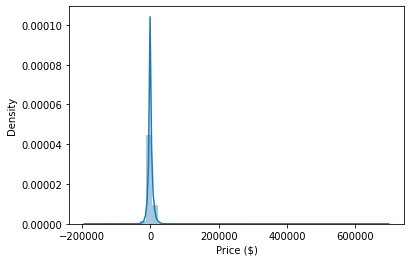

In [65]:
sns.distplot(y_test-predictions)

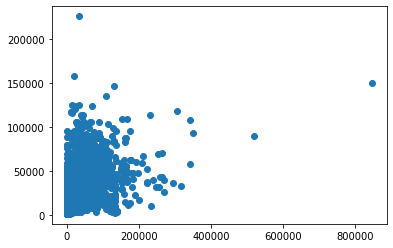

In [66]:
plt.scatter(y_test,predictions)

In [67]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 8695.714931608594


In [68]:
rf_random.score(X_test,y_test)

0.6225648871583509

# GB

In [34]:
gb = GradientBoostingRegressor(random_state=1, n_estimators=500)
gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [35]:
gb_test_predictions = gb.predict(X_test)

gb_test_rmse = np.sqrt(metrics.mean_squared_error(gb_test_predictions, y_test))
gb_test_rmse

9475.682481691745

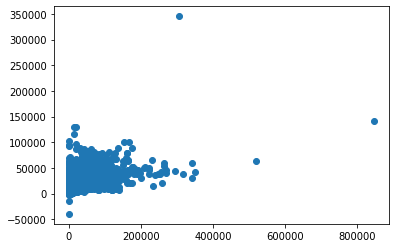

In [36]:
plt.scatter(y_test,gb_test_predictions)

(array([7.10000e+01, 1.21946e+05, 2.13000e+02, 2.30000e+01, 9.00000e+00,
        2.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-115565.48965256,  -33624.11864407,   48317.25236442,
         130258.62337291,  212199.9943814 ,  294141.36538989,
         376082.73639838,  458024.10740687,  539965.47841537,
         621906.84942386,  703848.22043235]),
 <a list of 10 Patch objects>)

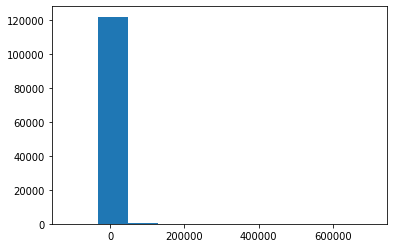

In [37]:
plt.hist(y_test-gb_test_predictions)

In [38]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gb_test_predictions)))

RMSE: 9475.682481691745


In [39]:
gb.score(X_test,y_test)

0.5518197531777991

# Average model of rf and gb

In [40]:
np.sqrt(metrics.mean_squared_error(y_test, (gb_test_predictions + rf_test_predictions)/2))

8500.216102779015

In [41]:
metrics.r2_score(y_test, (gb_test_predictions + rf_test_predictions)/2)

0.6393452584829931

# With Manufacturer_name feature

In [19]:
f_df_1 = df[['year', 'Price ($)', 'Odometer (km)', 'Gear', 'Fuel', 'Country', 'Manufacturer_name']]

In [20]:
f_df_1['no_year'] = 2021 - f_df_1['year']
f_df_1.drop(['year'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
f_df_1.shape

(407552, 7)

In [22]:
f_df_1 = pd.get_dummies(f_df_1, drop_first=True)

In [23]:
f_df_1.head()

,Price ($),Odometer (km),no_year,Gear_manual,Gear_other,Gear_semi-automatic,Fuel_electric,Fuel_gas,Fuel_gasoline,Fuel_hybrid,Fuel_other,Fuel_petrol,Country_Germany,Country_India,Country_US,Manufacturer_name_abarth,Manufacturer_name_acura,Manufacturer_name_aixam,Manufacturer_name_alfa,Manufacturer_name_alfa romeo,Manufacturer_name_alfa-romeo,Manufacturer_name_alpina,Manufacturer_name_alpine,Manufacturer_name_ambassador,Manufacturer_name_aston,Manufacturer_name_aston-martin,Manufacturer_name_audi,Manufacturer_name_baic,Manufacturer_name_bentley,Manufacturer_name_bmw,Manufacturer_name_brilliance,Manufacturer_name_buick,Manufacturer_name_cadillac,Manufacturer_name_caravans-wohnm,Manufacturer_name_chery,Manufacturer_name_chevrolet,Manufacturer_name_chrysler,Manufacturer_name_citroen,Manufacturer_name_corvette,Manufacturer_name_cupra,...,Manufacturer_name_mercedes-amg,Manufacturer_name_mercedes-benz,Manufacturer_name_mercury,Manufacturer_name_mg,Manufacturer_name_microcar,Manufacturer_name_mini,Manufacturer_name_mitsubishi,Manufacturer_name_morgan,Manufacturer_name_nissan,Manufacturer_name_opel,Manufacturer_name_opelcorsa,Manufacturer_name_others,Manufacturer_name_peugeot,Manufacturer_name_piaggio,Manufacturer_name_polestar,Manufacturer_name_pontiac,Manufacturer_name_porsche,Manufacturer_name_premier,Manufacturer_name_ram,Manufacturer_name_renault,Manufacturer_name_rolls-royce,Manufacturer_name_rover,Manufacturer_name_saab,Manufacturer_name_saturn,Manufacturer_name_seat,Manufacturer_name_skoda,Manufacturer_name_smart,Manufacturer_name_ssangyong,Manufacturer_name_subaru,Manufacturer_name_suzuki,Manufacturer_name_tata,Manufacturer_name_tesla,Manufacturer_name_toyota,Manufacturer_name_volkswagen,Manufacturer_name_volvo,Manufacturer_name_zhidou,Manufacturer_name_ваз,Manufacturer_name_газ,Manufacturer_name_заз,Manufacturer_name_уаз
0,6900.0,280000.0,18,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,4300.0,321000.0,19,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,10950.0,191000.0,16,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1850.0,417000.0,24,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2000.0,340000.0,28,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [24]:
f_df_1.corr()

,Price ($),Odometer (km),no_year,Gear_manual,Gear_other,Gear_semi-automatic,Fuel_electric,Fuel_gas,Fuel_gasoline,Fuel_hybrid,Fuel_other,Fuel_petrol,Country_Germany,Country_India,Country_US,Manufacturer_name_abarth,Manufacturer_name_acura,Manufacturer_name_aixam,Manufacturer_name_alfa,Manufacturer_name_alfa romeo,Manufacturer_name_alfa-romeo,Manufacturer_name_alpina,Manufacturer_name_alpine,Manufacturer_name_ambassador,Manufacturer_name_aston,Manufacturer_name_aston-martin,Manufacturer_name_audi,Manufacturer_name_baic,Manufacturer_name_bentley,Manufacturer_name_bmw,Manufacturer_name_brilliance,Manufacturer_name_buick,Manufacturer_name_cadillac,Manufacturer_name_caravans-wohnm,Manufacturer_name_chery,Manufacturer_name_chevrolet,Manufacturer_name_chrysler,Manufacturer_name_citroen,Manufacturer_name_corvette,Manufacturer_name_cupra,...,Manufacturer_name_mercedes-amg,Manufacturer_name_mercedes-benz,Manufacturer_name_mercury,Manufacturer_name_mg,Manufacturer_name_microcar,Manufacturer_name_mini,Manufacturer_name_mitsubishi,Manufacturer_name_morgan,Manufacturer_name_nissan,Manufacturer_name_opel,Manufacturer_name_opelcorsa,Manufacturer_name_others,Manufacturer_name_peugeot,Manufacturer_name_piaggio,Manufacturer_name_polestar,Manufacturer_name_pontiac,Manufacturer_name_porsche,Manufacturer_name_premier,Manufacturer_name_ram,Manufacturer_name_renault,Manufacturer_name_rolls-royce,Manufacturer_name_rover,Manufacturer_name_saab,Manufacturer_name_saturn,Manufacturer_name_seat,Manufacturer_name_skoda,Manufacturer_name_smart,Manufacturer_name_ssangyong,Manufacturer_name_subaru,Manufacturer_name_suzuki,Manufacturer_name_tata,Manufacturer_name_tesla,Manufacturer_name_toyota,Manufacturer_name_volkswagen,Manufacturer_name_volvo,Manufacturer_name_zhidou,Manufacturer_name_ваз,Manufacturer_name_газ,Manufacturer_name_заз,Manufacturer_name_уаз
Price ($),1.000000,-0.460581,-0.534409,-0.221902,0.301542,-0.006518,0.042377,-0.095165,-0.065997,0.012454,0.166049,-0.087360,0.038152,-0.099724,0.091214,0.003759,0.027622,0.000173,0.009587,-0.012753,0.037116,0.020752,0.012978,0.003335,0.095717,0.003576,0.089780,0.000526,0.078210,0.053774,-0.001775,-0.017099,0.024416,0.000224,-0.008860,0.030125,-0.056862,-0.042736,0.021236,0.026612,...,0.005847,0.067647,-0.043368,0.003234,-0.003426,-0.016380,-0.027417,0.004218,-0.074159,-0.060518,-0.003007,-0.003655,-0.046311,-0.001800,0.012635,-0.054391,0.097717,-0.002231,0.149589,-0.055804,0.034275,0.034952,-0.005976,-0.044093,-0.017898,-0.021387,-0.027407,-0.003017,-0.040972,-0.016913,-0.017929,0.061677,-0.018999,-0.043157,0.024176,-0.000354,-0.009479,-0.003560,-0.003911,-0.003307
Odometer (km),-0.460581,1.000000,0.681548,-0.095976,-0.354099,-0.006430,-0.065510,0.197211,-0.148434,-0.021797,-0.146533,-0.147375,-0.237051,-0.184240,0.212368,-0.011219,-0.025213,-0.003810,-0.012115,0.014698,-0.045755,-0.004717,-0.003974,-0.001925,-0.010122,-0.005529,-0.052105,-0.003340,-0.008184,-0.039475,-0.000624,-0.015631,-0.016778,-0.001044,-0.000769,0.058841,0.026674,0.007743,-0.003375,-0.016820,...,-0.001828,-0.023874,0.031356,-0.009049,-0.005937,-0.028639,-0.017812,-0.003998,0.014227,-0.030272,-0.001730,-0.007690,0.004275,-0.002931,-0.004348,0.047855,-0.015586,-0.001995,0.030164,-0.041532,-0.003402,-0.006263,0.010832,0.029860,-0.041370,-0.054545,-0.042729,-0.002867,0.024660,-0.018790,-0.036682,-0.034638,0.069500,-0.052610,-0.012255,-0.002159,-0.002038,0.003079,-0.001873,-0.002435
no_year,-0.534409,0.681548,1.000000,0.057609,-0.302765,-0.001707,-0.052272,0.129742,-0.035167,-0.040875,-0.154690,-0.048687,-0.205500,-0.075169,0.083784,-0.009925,-0.026671,-0.002947,-0.009500,0.028062,-0.043064,-0.003618,-0.004158,0.003209,-0.008356,0.003014,-0.041160,-0.002620,-0.004448,-0.010062,0.000471,-0.002810,-0.006499,-0.001538,0.004199,0.035109,0.030094,0.025492,-0.002620,-0.017647,...,-0.001229,0.010317,0.065773,-0.008475,-0.001886,-0.009593,-0.007026,0.002358,-0.009698,-0.009359,0.003760,-0.004492,0.029080,-0.000330,-0.004583,0.080432,0.010817,0.000265

In [25]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(f_df_1)

In [26]:
X1 = f_df_1.iloc[:,1:]
y1 = f_df_1.iloc[:,0]

In [27]:
model = ExtraTreesRegressor()
model.fit(X1,y1)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

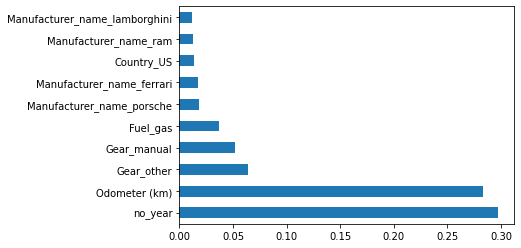

In [28]:
feat_importances = pd.Series(model.feature_importances_, index=X1.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [29]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

#LR

In [31]:
model = LinearRegression()
model.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
pd.DataFrame(model.coef_, X1.columns, columns = ['Coeff'])

,Coeff
Odometer (km),-0.038718
no_year,-943.148854
Gear_manual,-4542.907610
Gear_other,2384.808122
Gear_semi-automatic,-3211.376997
...,...
Manufacturer_name_zhidou,5000.403614
Manufacturer_name_ваз,4658.256877
Manufacturer_name_газ,3439.445960
Manufacturer_name_заз,-2072.915174


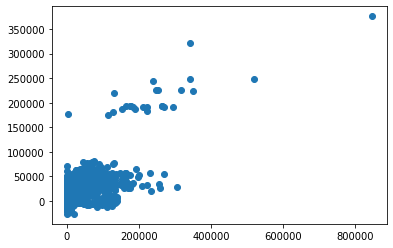

In [33]:
predictions = model.predict(X1_test)

plt.scatter(y1_test, predictions)

(array([1.00000e+00, 1.00000e+01, 1.19551e+05, 2.57900e+03, 1.12000e+02,
        6.00000e+00, 5.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-174001.21002235, -109595.99050754,  -45190.77099272,
          19214.44852209,   83619.6680369 ,  148024.88755171,
         212430.10706653,  276835.32658134,  341240.54609615,
         405645.76561096,  470050.98512578]),
 <a list of 10 Patch objects>)

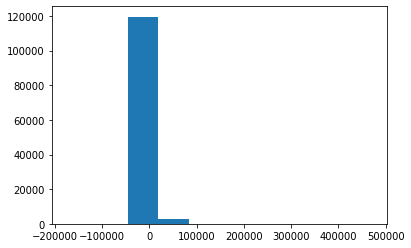

In [34]:
plt.hist(y1_test - predictions)

In [35]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, predictions)))

RMSE: 9209.625266563187


In [36]:
from sklearn.metrics import r2_score

r2_score(y1_test, predictions)

0.5766343377083281

# RF

In [30]:
#rf = RandomForestRegressor()
rf1 = RandomForestRegressor(random_state=1, n_estimators=500)
rf1.fit(X1_train, y1_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [31]:
rf_test_predictions=rf1.predict(X1_test)

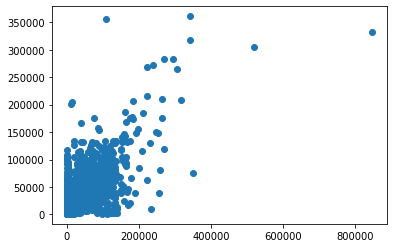

In [32]:
plt.scatter(y1_test,rf_test_predictions)

(array([3.00000e+00, 9.00000e+00, 1.05000e+03, 1.21093e+05, 9.80000e+01,
        8.00000e+00, 4.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-246335.29233333, -170394.48978   ,  -94453.68722667,
         -18512.88467333,   57427.91788   ,  133368.72043333,
         209309.52298667,  285250.32554   ,  361191.12809333,
         437131.93064667,  513072.7332    ]),
 <a list of 10 Patch objects>)

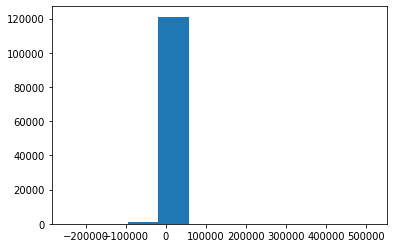

In [33]:
#sns.distplot(y1_test-predictions)
plt.hist(y1_test-rf_test_predictions)

In [34]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, rf_test_predictions)))

RMSE: 6745.74002223253


In [35]:
rf1.score(X1_test,y1_test)

0.7728614173144522

In [ ]:
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
# Create the random grid
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [ ]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=5, random_state=42, n_jobs = None)

In [ ]:
rf_random.fit(X1_train,y1_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, score=0.410, total=   7.3s
[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s remaining:    0.0s


[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, score=0.438, total=   7.0s
[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.3s remaining:    0.0s


[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, score=0.441, total=   6.9s
[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   21.2s remaining:    0.0s


[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, score=0.466, total=   7.6s
[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   28.8s remaining:    0.0s


[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, score=0.465, total=   6.8s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, score=0.427, total=  24.0s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, score=0.458, total=  23.5s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, score=0.458, total=  23.1s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, score=0.487, total=  23.2s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5,

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 23.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
predictions=rf_random.predict(X1_test)

In [ ]:
predictions

array([10104.79970158, 14346.80280515,  8492.68912903, ...,
       25574.10185094, 18695.26311742,  5618.03581749])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


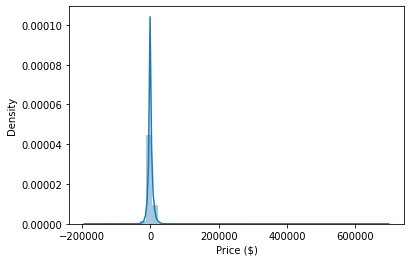

In [ ]:
sns.distplot(y1_test-predictions)

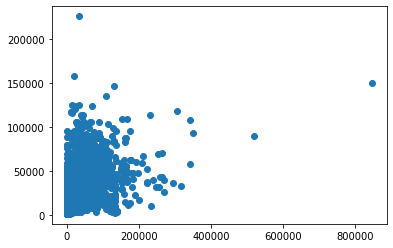

In [ ]:
plt.scatter(y1_test,predictions)

In [ ]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, predictions)))

RMSE: 8695.714931608594


In [ ]:
rf_random.score(X1_test,y1_test)

0.6225648871583509

# GB

In [36]:
gb = GradientBoostingRegressor(random_state=1, n_estimators=500)
gb.fit(X1_train, y1_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [37]:
gb_test_predictions = gb.predict(X1_test)

gb_test_rmse = np.sqrt(metrics.mean_squared_error(gb_test_predictions, y1_test))
gb_test_rmse

7882.316200415323

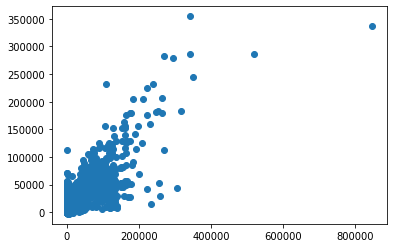

In [38]:
plt.scatter(y1_test,gb_test_predictions)

(array([5.00000e+00, 1.00139e+05, 2.20240e+04, 8.60000e+01, 6.00000e+00,
        4.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-121510.79544855,  -58393.48206294,    4723.83132268,
          67841.14470829,  130958.4580939 ,  194075.77147951,
         257193.08486513,  320310.39825074,  383427.71163635,
         446545.02502196,  509662.33840758]),
 <a list of 10 Patch objects>)

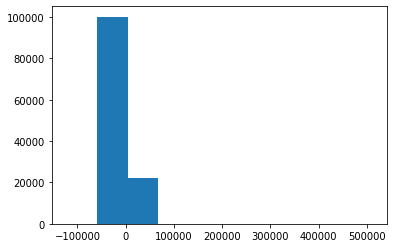

In [39]:
plt.hist(y1_test-gb_test_predictions)

In [40]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, gb_test_predictions)))

RMSE: 7882.316200415323


In [41]:
gb.score(X1_test,y1_test)

0.6898731146141204

# Average model of rf and gb

In [42]:
np.sqrt(metrics.mean_squared_error(y1_test, (gb_test_predictions + rf_test_predictions)/2))

6669.901940393161

In [43]:
metrics.r2_score(y1_test, (gb_test_predictions + rf_test_predictions)/2)

0.7779398594849636